In [1]:
import pandas as pd

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat
df = pd.read_csv('airfoil_self_noise.dat', sep='\t', header=None)
df.columns = ['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity', 'Suction side displacement thickness', 'Scaled sound pressure level']


--2025-03-13 02:06:04--  https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘airfoil_self_noise.dat.11’

airfoil_self_noise.     [ <=>                ]  58.58K  --.-KB/s    in 0.05s   

2025-03-13 02:06:04 (1.16 MB/s) - ‘airfoil_self_noise.dat.11’ saved [59984]



In [2]:
df.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


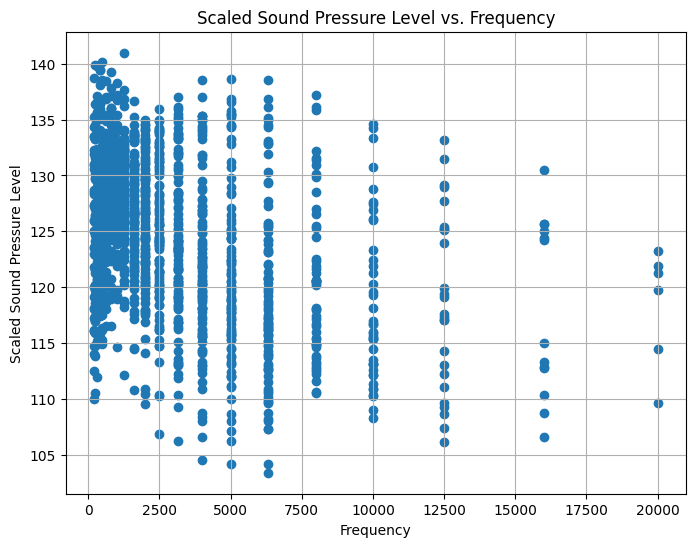

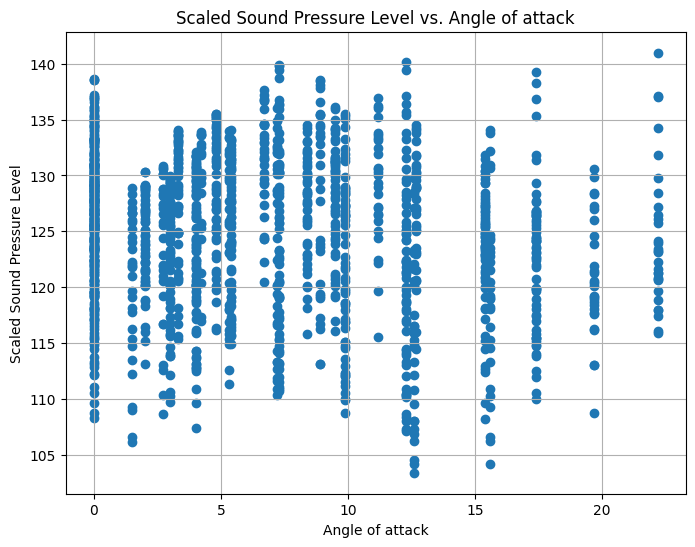

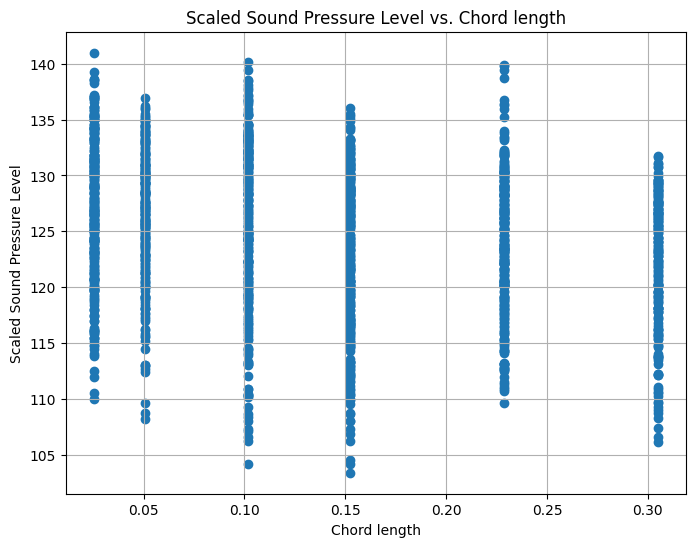

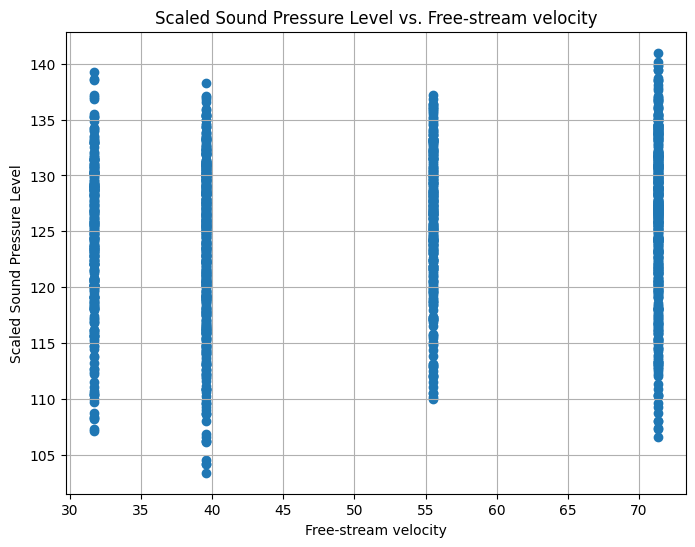

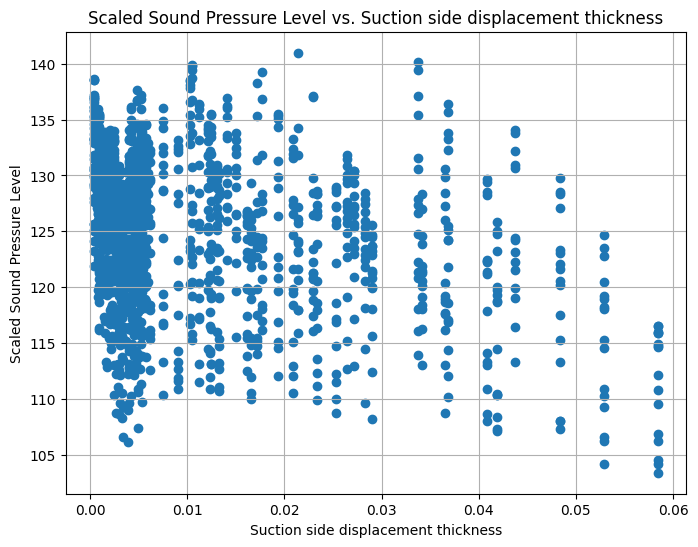

In [3]:
import matplotlib.pyplot as plt

features = ['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity', 'Suction side displacement thickness']

for feature in features:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    plt.scatter(df[feature], df['Scaled sound pressure level'])  # Create scatter plot
    plt.title(f'Scaled Sound Pressure Level vs. {feature}')  # Set title
    plt.xlabel(feature)  # Set x-axis label
    plt.ylabel('Scaled Sound Pressure Level')  # Set y-axis label
    plt.grid(True)  # Add grid for better readability
    plt.show()  # Display the plot

In [4]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df[['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity', 'Suction side displacement thickness']]
y = df['Scaled sound pressure level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
import numpy as np
from tensorflow.keras.utils import to_categorical

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=[X_train.shape[1]]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer with a single neuron for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=1250, batch_size=64, validation_data=(X, y))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1250
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 1299647.2500 - mse: 1299647.2500 - val_loss: 19332.7656 - val_mse: 19332.7656
Epoch 2/1250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 24482.1602 - mse: 24482.1602 - val_loss: 45464.9258 - val_mse: 45464.9258
Epoch 3/1250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 34713.2852 - mse: 34713.2852 - val_loss: 9646.8174 - val_mse: 9646.8174
Epoch 4/1250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11077.6387 - mse: 11077.6387 - val_loss: 8970.5459 - val_mse: 8970.5459
Epoch 5/1250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9007.9414 - mse: 9007.9414 - val_loss: 8738.2666 - val_mse: 8738.2666
Epoch 6/1250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8578.7383 - mse: 8578.7383 - val_loss: 8179.0142 - val_mse: 8179.0142
Epoch 7/1250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8548.7451 - mse: 8548.7451 - val_loss: 7801.8364 - val_mse: 7801.8364
Epoch 8/1250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7867.5215

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


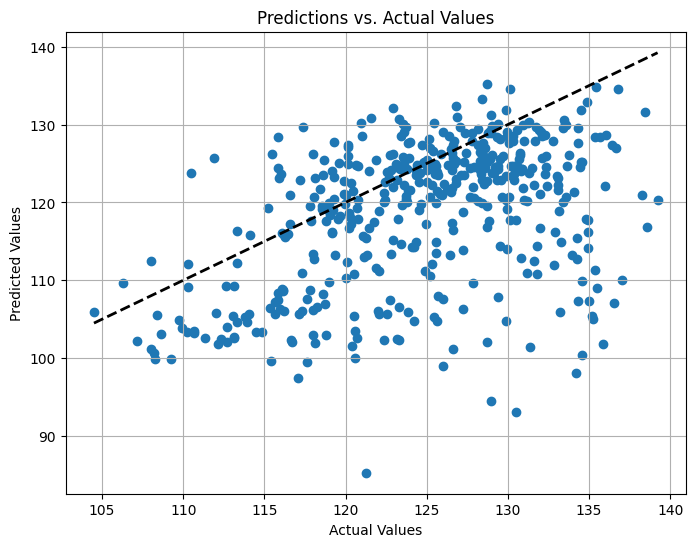

In [6]:
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a scatter plot of predictions vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Add a diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs. Actual Values')
plt.grid(True)
plt.show()

In [7]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: -1.3964034126522709
